In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 150

In [47]:
bank=pd.read_csv("creditcard.csv")

In [48]:
bank.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
bank.shape

(284807, 31)

In [50]:
frauds=bank.loc[bank['Class']==1]
len(frauds)

492

In [51]:
no_frauds=bank.loc[bank['Class']==0]
len(no_frauds)

284315

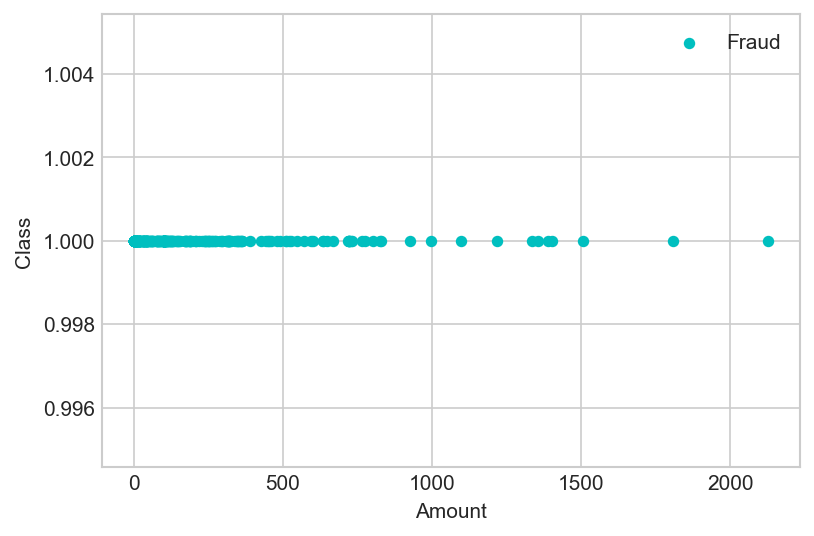

In [57]:
frauds.plot(kind="scatter",x='Amount',y='Class',color='c',label='Fraud')

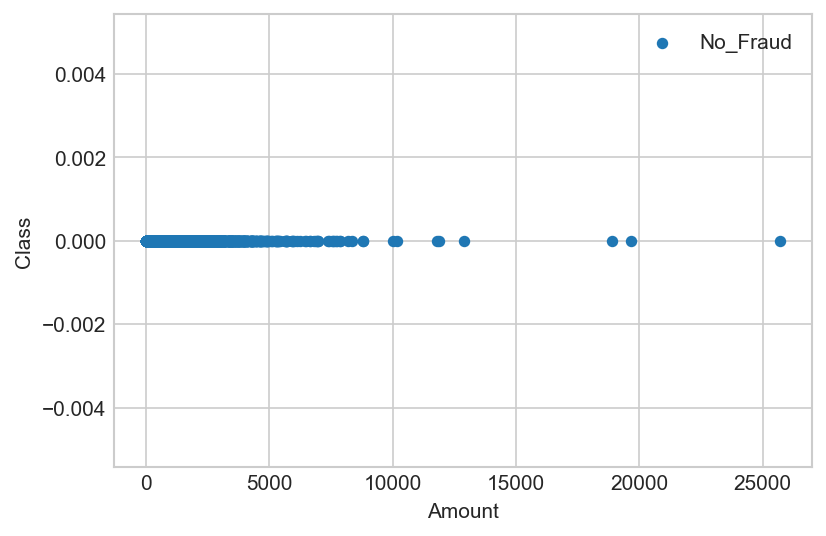

In [58]:
no_frauds.plot(kind="scatter",x='Amount',y='Class',label='No_Fraud')

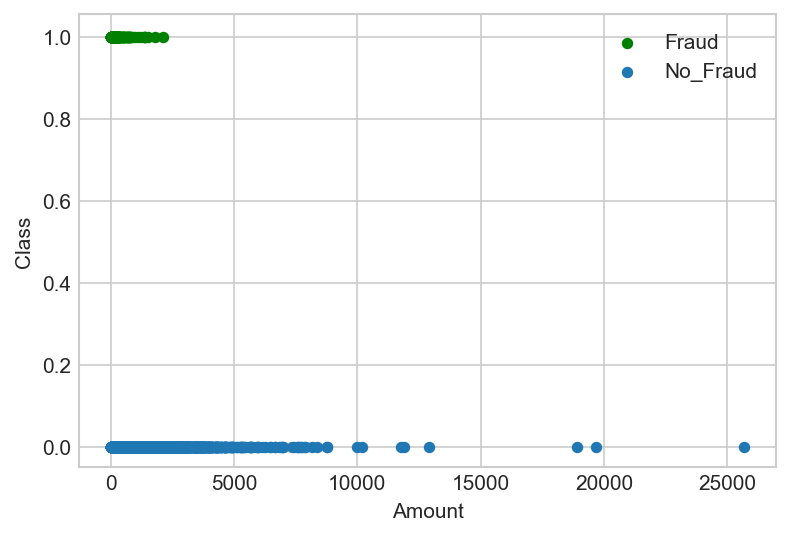

In [52]:
fraud_plot=frauds.plot(kind="scatter",x='Amount',y='Class',color='green',label='Fraud')
no_frauds.plot(kind="scatter",x='Amount',y='Class',ax=fraud_plot,label='No_Fraud')

In [61]:
target=bank['Class']

In [62]:
target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [64]:
bank_X=bank.drop(['Class'],axis=1)

In [65]:
bank_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scalar=StandardScaler()

In [69]:
scalar.fit(bank_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
scaled_data=pd.DataFrame(scalar.transform(bank_X),columns=bank_X.columns)

In [76]:
scaled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [78]:
bank_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data,target,test_size=0.2)

In [83]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
117778,-0.421282,-0.294916,0.447778,0.713691,-0.442561,0.264437,-0.408048,0.944780,0.031575,-0.790117,...,-0.138674,-0.202464,-0.904134,0.346895,0.306507,-1.156773,-0.175208,0.109090,0.392810,-0.125738
81840,-0.751702,-1.045519,-1.446336,0.304234,-1.388538,1.469853,2.485683,-1.838992,1.477234,-0.192651,...,0.862869,0.456289,0.185900,-0.176543,1.734827,0.787088,-0.579850,-0.115855,-1.023873,-0.101350
160247,0.386795,1.033790,-0.103879,-0.944885,0.060056,0.112032,-0.430412,-0.025802,-0.048086,0.607458,...,-0.389123,0.424596,1.320892,0.046197,1.148914,0.498262,-0.966105,-0.011790,-0.180705,-0.349231
257472,1.334423,-0.079827,0.521080,-0.226573,-0.740126,0.786258,-0.014820,0.684265,-0.026296,-0.026238,...,-0.049224,-0.366296,-1.012806,-0.130952,-2.315245,-0.702299,0.376374,-0.077311,0.217339,-0.333279
246333,1.228059,1.009243,-0.561392,-1.697778,-0.188164,-0.108914,-1.350326,0.538148,-0.535196,-0.810619,...,-0.599804,-0.055681,0.153238,-0.327768,0.011500,0.759260,2.098593,-0.400002,-0.215461,0.266394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42347,-1.131903,0.405919,-0.816470,0.180481,-0.572028,-0.849607,0.025626,-0.430375,0.170449,1.723936,...,0.378955,0.354274,0.500741,-0.701626,-0.818682,1.067294,-1.071385,0.081549,0.158992,0.616307
265527,1.413200,1.205211,-0.817047,-0.887104,-1.228849,-0.558184,-0.155288,-0.889128,-0.104417,-1.039046,...,-0.565202,-0.303032,-0.200986,0.310914,-0.006861,-0.156338,-0.303479,0.011423,-0.162652,-0.313249
248242,1.243284,0.803743,-0.502595,-0.394214,0.896866,-0.388561,0.070362,-0.282107,0.066131,0.643433,...,0.193644,0.488270,0.967650,-0.160132,-0.837773,-0.264827,-1.184506,0.034151,-0.035492,0.446388
256284,1.322588,-0.471163,0.345228,-0.974254,-3.506560,1.929560,1.902198,0.306303,1.015148,0.854746,...,-0.227111,-0.229787,-0.766457,-0.236208,1.091100,0.747343,-2.593381,0.622819,0.338241,-0.343834


In [84]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
17149,-1.396874,0.585829,0.142952,0.563798,1.561618,-0.031723,0.562992,-0.344497,0.103391,-0.273558,...,0.103636,0.068085,0.106393,-0.317843,-1.633982,0.835236,0.165251,0.076164,0.108447,-0.149487
75661,-0.813423,0.582556,-0.202668,0.338028,0.120126,-0.712827,-0.750717,-0.179966,-0.067399,0.519656,...,-0.045181,-0.149852,-0.757557,0.090506,0.663312,0.074359,1.805346,-0.229754,0.057156,-0.065567
76501,-0.804726,-0.205781,0.593304,0.748066,-0.123558,0.266096,-0.007917,0.395737,0.224993,-0.492028,...,0.083590,-0.289984,-0.791939,-0.045809,-0.622581,-0.462273,0.220993,0.627918,0.242349,-0.334998
261052,1.369379,0.997898,-0.192454,-0.143929,0.418906,-0.502966,-0.460656,-0.374752,-0.063127,0.911094,...,-0.218251,-0.256112,-0.587879,0.642993,-0.042874,-1.119077,-0.043687,-0.022576,-0.108637,-0.273308
49985,-1.063907,0.609204,-0.846338,0.375382,-0.861931,-1.266708,-0.618734,-0.622257,-0.248445,-1.793245,...,0.120370,-0.347940,-0.938530,0.034533,0.637957,0.229882,-0.896264,0.054057,0.184355,0.341238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268473,1.440681,1.107395,-0.458042,-0.953272,-0.696636,-0.237730,-0.603075,-0.248943,-0.190482,-0.642750,...,-0.026904,0.093439,0.253120,0.219254,-0.638304,-0.039618,-0.568212,-0.108389,-0.228339,-0.257955
187733,0.691798,-0.967765,-0.403225,0.691110,-1.529080,0.334428,-0.084259,0.761639,0.007170,0.600506,...,0.167360,-0.512998,-1.309940,0.682927,0.139487,1.119877,0.746879,0.419457,0.343159,0.426397
175466,0.579833,1.043587,0.104798,-1.443538,0.186388,0.640522,-0.468536,0.292545,-0.295258,0.350334,...,0.041242,0.249168,0.902879,-0.210736,0.020525,0.788607,-0.209004,-0.013698,-0.064465,-0.179073
266265,1.420234,-0.298723,0.204240,0.761595,-0.508102,-0.671315,0.456819,-0.288779,0.524647,1.400616,...,-0.444085,0.470557,1.751660,0.063535,-0.999690,-2.092513,-0.974465,0.311722,0.589481,-0.047856


In [85]:
y_train.head()

117778    0
81840     0
160247    0
257472    0
246333    0
Name: Class, dtype: int64

In [86]:
y_test.head()

17149     0
75661     0
76501     0
261052    0
49985     0
Name: Class, dtype: int64

In [87]:
from sklearn.linear_model import LogisticRegressionCV

In [88]:
model=LogisticRegressionCV()

In [89]:
model.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [90]:
predict=model.predict(X_test)

In [92]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
y_test[:5]

17149     0
75661     0
76501     0
261052    0
49985     0
Name: Class, dtype: int64

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [96]:
print(f"Accuracy Score: {accuracy_score(y_test, predict)*100:.2f}")

Accuracy Score: 99.91


In [97]:
print(f"Confusion Matrix \n\n ", confusion_matrix(y_test, predict))

Confusion Matrix 

  [[56850    10]
 [   40    62]]


In [99]:
print(f"Classification Report\n\n", classification_report(y_test, predict))

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.86      0.61      0.71       102

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [100]:
np = model.predict(X_train)
print(f"Classification Report\n\n", classification_report(y_train, np))

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227455
           1       0.88      0.63      0.74       390

    accuracy                           1.00    227845
   macro avg       0.94      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [101]:
print(f"Confusion Matrix \n\n ", confusion_matrix(y_train, np))

Confusion Matrix 

  [[227422     33]
 [   143    247]]


In [104]:
c_matrix = pd.DataFrame(confusion_matrix(y_train, np), columns=['No_fraud', 'Fraud'],
                   index=['No_fraud', 'Fraud'] )

In [109]:
c_matrix

,No_fraud,Fraud
No_fraud,227422,33
Fraud,143,247


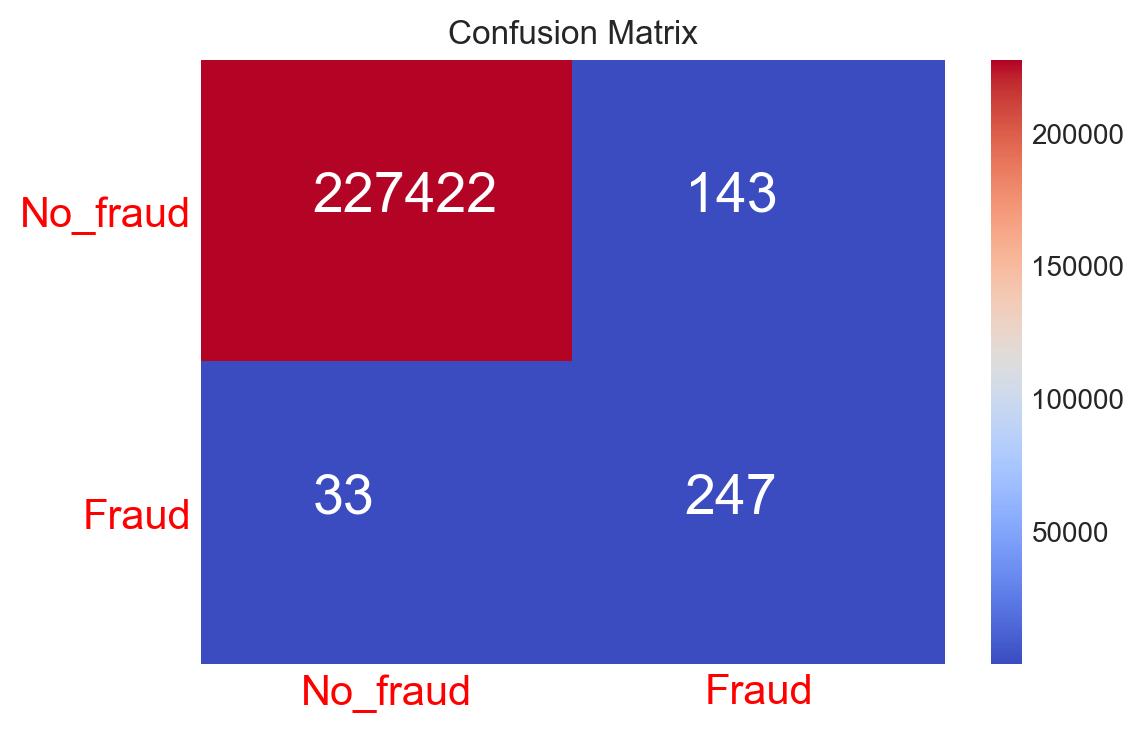

In [113]:
plt.figure(dpi=200)
plt.title("Confusion Matrix")
sns.heatmap(cnf, cmap='coolwarm')
plt.xticks(fontsize=15, color='red')
plt.yticks(fontsize=15, color='red', rotation=0)
for i in range(0, 2):
    for j in range(0, 2):
        plt.text(i+0.3, j+0.5, c_matrix.iloc[i, j], color='white', fontsize=20)
plt.show()